In [39]:
# expand border width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# hide warning messages
import warnings
warnings.filterwarnings('ignore')

# Needed libraries
import pandas as pd
pd.set_option("display.width", 500) # widens the output display ex: when printing head()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy import stats

# Import the data into a master variable to hold the raw data in case it's needed
dataFileNamePath = 'Data/PreData.csv'
masterRawData = pd.read_csv(dataFileNamePath)
display('Master copy made')
# Create another dataframe variable as a copy of the master data to work with 
data = masterRawData.copy()

'Master copy made'

In [40]:
display(data.sort_values(by=['ID', 'Semester'], ascending=[True, True]).head(100))

,Semester,ID,StudentGroupLabels,WITHDRAW_CODE,WITHDRAW_REASON,City,State,County,country,Postal,...,CreditsCurrentlyEnrolled,TotalCreditsComplete,AcademicLevel,CumulativeGPA,TermGPA,TransferCredits,Status,DEGREE,DegreeGPA,DegreeCompletedTerm
0,1169,1,AcceleratedProgram,NWD,,New York,NY,New York,,10026,...,16.0,3.0,11,1.000,1.000,0.0,Fulltime,NaN,NaN,NaN
1,1172,1,CONT,NWD,,New York,NY,New York,,10026,...,13.0,16.0,11,2.206,2.484,0.0,Fulltime,NaN,NaN,NaN
2,1179,1,CONT,NWD,,New York,NY,New York,,10026,...,16.0,22.0,15,1.412,0.618,0.0,Fulltime,NaN,NaN,NaN
3,1182,1,CONT,NWD,,New York,NY,New York,,10026,...,11.0,22.0,15,1.051,0.000,0.0,Parttime,NaN,NaN,NaN
4,1186,2,Remedial,NWD,,Staten Island,NY,Richmond,,10306,...,0.0,0.0,11,0.000,0.000,0.0,Parttime,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1179,15,SUPPORT,NWD,,Staten Island,NY,Richmond,,10303,...,12.0,104.0,45,2.232,1.591,0.0,Fulltime,NaN,NaN,NaN
96,1179,15,Veteran,NWD,,Staten Island,NY,Richmond,,10303,...,12.0,104.0,45,2.232,1.591,0.0,Fulltime,NaN,NaN,NaN
97,1182,15,CONT,NWD,,Staten Island,NY,Richmond,,10303,...,16.0,112.0,41,2.067,1.187,0.0,Fulltime,NaN,NaN,NaN
98,1182,15,FIN,NWD,,Staten Island,NY,Richmond,,10303,...,16.0,112.0,41,2.067,1.187,0.0,Fulltime,NaN,NaN,NaN


In [41]:
display(data.sort_values(by=['ID', 'Semester'], ascending=[True, True]).tail(100))

,Semester,ID,StudentGroupLabels,WITHDRAW_CODE,WITHDRAW_REASON,City,State,County,country,Postal,...,CreditsCurrentlyEnrolled,TotalCreditsComplete,AcademicLevel,CumulativeGPA,TermGPA,TransferCredits,Status,DEGREE,DegreeGPA,DegreeCompletedTerm
226688,1232,46844,CONT,NWD,,Staten Island,NY,Richmond,,10306,...,7.0,20.0,11,2.852,2.428,0.0,Parttime,NaN,NaN,NaN
226689,1239,46844,CONT,NWD,,Staten Island,NY,Richmond,,10306,...,13.0,33.0,15,2.784,2.684,0.0,Fulltime,NaN,NaN,NaN
226690,1242,46844,CONT,NWD,,Staten Island,NY,Richmond,,10306,...,12.0,33.0,21,2.784,0.000,0.0,Fulltime,NaN,NaN,NaN
226691,1179,46846,AcceleratedProgram,NWD,,Staten Island,NY,Richmond,,10314,...,16.0,12.0,11,3.100,3.100,0.0,Fulltime,AA,2.56,1199.0
226692,1179,46846,Scholarship,NWD,,Staten Island,NY,Richmond,,10314,...,16.0,12.0,11,3.100,3.100,0.0,Fulltime,AA,2.56,1199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226783,1192,46867,CONT,NWD,,Bronx,NY,Bronx,,10458,...,15.0,57.0,21,2.968,2.592,0.0,Fulltime,AA,2.87,1232.0
226784,1232,46867,ACE,NWD,,Bronx,NY,Bronx,,10458,...,5.0,66.0,31,2.866,3.200,0.0,Parttime,AA,2.87,1232.0
226785,1232,46867,CONT,NWD,,Bronx,NY,Bronx,,10458,...,5.0,66.0,31,2.866,3.200,0.0,Parttime,AA,2.87,1232.0
226786,1236,46867,CONT,NWD,,Bronx,NY,Bronx,,10458,...,0.0,66.0,31,2.866,0.000,0.0,Parttime,AA,2.87,1232.0


In [42]:
# Find the value with the most repeated rows in 'ColumnB' 

most_common_value = data['ID'].value_counts().idxmax() 
print("ID with the most occurence: ", most_common_value)
data[data['ID'] == most_common_value].sort_values(by='Semester')


ID with the most occurence:  34155


,Semester,ID,StudentGroupLabels,WITHDRAW_CODE,WITHDRAW_REASON,City,State,County,country,Postal,...,CreditsCurrentlyEnrolled,TotalCreditsComplete,AcademicLevel,CumulativeGPA,TermGPA,TransferCredits,Status,DEGREE,DegreeGPA,DegreeCompletedTerm
165683,1169,34155,Disability,NWD,,Staten Island,NY,Richmond,,10308,...,0.0,0.0,11,0.000,0.0,0.0,Parttime,BA,3.26,1212.0
165684,1169,34155,Disability,NWD,,Staten Island,NY,Richmond,,10308,...,0.0,0.0,11,0.000,0.0,0.0,Parttime,BS,3.26,1212.0
165685,1169,34155,EnteringFresh,NWD,,Staten Island,NY,Richmond,,10308,...,0.0,0.0,11,0.000,0.0,0.0,Parttime,BA,3.26,1212.0
165686,1169,34155,EnteringFresh,NWD,,Staten Island,NY,Richmond,,10308,...,0.0,0.0,11,0.000,0.0,0.0,Parttime,BS,3.26,1212.0
165687,1169,34155,FIN,NWD,,Staten Island,NY,Richmond,,10308,...,0.0,0.0,11,0.000,0.0,0.0,Parttime,BA,3.26,1212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165743,1212,34155,Disability,NWD,,Staten Island,NY,Richmond,,10308,...,10.0,157.0,45,3.255,4.0,0.0,Parttime,BA,3.26,1212.0
165745,1212,34155,FIN,NWD,,Staten Island,NY,Richmond,,10308,...,10.0,157.0,45,3.255,4.0,0.0,Parttime,BA,3.26,1212.0
165741,1212,34155,CONT,NWD,,Staten Island,NY,Richmond,,10308,...,10.0,157.0,45,3.255,4.0,0.0,Parttime,BA,3.26,1212.0
165742,1212,34155,CONT,NWD,,Staten Island,NY,Richmond,,10308,...,10.0,157.0,45,3.255,4.0,0.0,Parttime,BS,3.26,1212.0


From the previous search for a student that had the most occurence, we see another duplication level with the Degrees earned.  This student earned 2 Degrees (a BS and a BA degree).  And for each of these two values, his records are duplicated.  For example, this students' enrollment for the 169 (Fall of 2016) semester is appears twice for the each unique StudentGroupLabels.  I will need to transpose the Degree somehow to avoid this.  Will add it as a to do in the processing list.   

In [43]:
# General Look over
print("Dataframe shape is: ", data.shape, data.shape[0], "Rows, ", data.shape[1], "Column\n ")

display("Data Info")
display(data.info())

display("Data Describe")
display(data.describe().T)

Dataframe shape is:  (226788, 37) 226788 Rows,  37 Column
 


'Data Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226788 entries, 0 to 226787
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Semester                  226788 non-null  int64  
 1   ID                        226788 non-null  int64  
 2   StudentGroupLabels        226788 non-null  object 
 3   WITHDRAW_CODE             226788 non-null  object 
 4   WITHDRAW_REASON           226788 non-null  object 
 5   City                      226788 non-null  object 
 6   State                     226646 non-null  object 
 7   County                    225460 non-null  object 
 8   country                   226788 non-null  object 
 9   Postal                    226788 non-null  object 
 10  Gender                    226788 non-null  object 
 11  BirthYear                 226762 non-null  object 
 12  HighestEducLevel          676 non-null     object 
 13  Mar_Status                676 non-null     o

None

'Data Describe'

,count,mean,std,min,25%,50%,75%,max
Semester,226788.0,1195.138182,27.585818,1132.0,1172.000,1192.00,1219.000,1242.0
ID,226788.0,23399.642622,13535.499813,1.0,11644.000,23483.50,35075.000,46867.0
CreditsCurrentlyEnrolled,226788.0,10.397349,5.589340,0.0,6.000,12.00,15.000,35.0
TotalCreditsComplete,226788.0,57.735690,42.834606,0.0,22.000,50.00,90.000,344.5
CumulativeGPA,226788.0,2.778556,0.988666,0.0,2.412,3.00,3.471,4.0
TermGPA,226788.0,2.528585,1.367400,0.0,1.850,3.00,3.644,4.0
TransferCredits,226788.0,0.819364,6.678114,0.0,0.000,0.00,0.000,185.0
DegreeGPA,118938.0,3.194340,0.532939,0.0,2.870,3.24,3.590,4.0
DegreeCompletedTerm,118938.0,1207.081816,18.641818,1132.0,1192.000,1209.00,1222.000,1236.0


In [44]:
# Nulls
print(data.shape[0], "Total Rows ")
display("Null Values per Column\n", data.isna().sum())
display("Total Rows With Values: Total Rows minus Total Null Values per Column", data.shape[0] - data.isna().sum())
display("Percentage of NULLS: ", data.isna().sum(axis=0)/data.shape[0]*100)
display("")

226788 Total Rows 


'Null Values per Column\n'

Semester                         0
ID                               0
StudentGroupLabels               0
WITHDRAW_CODE                    0
WITHDRAW_REASON                  0
City                             0
State                          142
County                        1328
country                          0
Postal                           0
Gender                           0
BirthYear                       26
HighestEducLevel            226112
Mar_Status                  226112
Acad_Career                      0
Major1                       30638
Major2                      223249
Major3                      226679
Major4                      226777
Major5                      226784
Major6                      226784
Minor1                      203014
Minor2                      222893
Minor3                      226345
Minor4                      226743
Minor5                      226774
Minor6                      226777
CreditsCurrentlyEnrolled         0
TotalCreditsComplete

'Total Rows With Values: Total Rows minus Total Null Values per Column'

Semester                    226788
ID                          226788
StudentGroupLabels          226788
WITHDRAW_CODE               226788
WITHDRAW_REASON             226788
City                        226788
State                       226646
County                      225460
country                     226788
Postal                      226788
Gender                      226788
BirthYear                   226762
HighestEducLevel               676
Mar_Status                     676
Acad_Career                 226788
Major1                      196150
Major2                        3539
Major3                         109
Major4                          11
Major5                           4
Major6                           4
Minor1                       23774
Minor2                        3895
Minor3                         443
Minor4                          45
Minor5                          14
Minor6                          11
CreditsCurrentlyEnrolled    226788
TotalCreditsComplete

'Percentage of NULLS: '

Semester                     0.000000
ID                           0.000000
StudentGroupLabels           0.000000
WITHDRAW_CODE                0.000000
WITHDRAW_REASON              0.000000
City                         0.000000
State                        0.062614
County                       0.585569
country                      0.000000
Postal                       0.000000
Gender                       0.000000
BirthYear                    0.011464
HighestEducLevel            99.701924
Mar_Status                  99.701924
Acad_Career                  0.000000
Major1                      13.509533
Major2                      98.439512
Major3                      99.951937
Major4                      99.995150
Major5                      99.998236
Major6                      99.998236
Minor1                      89.517082
Minor2                      98.282537
Minor3                      99.804663
Minor4                      99.980158
Minor5                      99.993827
Minor6      

''

In [45]:
# Loop to display unique values for each non-numeric column and the number of unique values (len())
for column in data.select_dtypes(exclude='number').columns:
    unique_values = data[column].unique()
    print("Total: ", len(unique_values), f" Unique values in column '{column}': {unique_values}")
    print()

Total:  38  Unique values in column 'StudentGroupLabels': ['AcceleratedProgram' 'CONT' 'Remedial' 'Transfer' 'EnteringFresh'
 'Disability' 'FIN' 'CNOW' 'Scholarship' 'FirstGenerationCollStud'
 'InternationalStudent' 'WorkStudy' 'SUPPORT' 'ContinuingAdv' 'Veteran'
 'GRAD' 'BACC' 'DayStudent' 'FreshmanForgiveness' 'Dorm' 'CitzenProof'
 'Honors' 'ATHL' 'Career' 'BaccFail' 'Visiting' 'BackToSchool'
 'HealthWork' 'ACE' 'Evening' 'Abroad' 'FOST' 'ContEdHealth' 'BaccNurs'
 'Weekend' 'DisasterReliefEffort' 'FosterYouth' 'ContinuingBACC']

Total:  3  Unique values in column 'WITHDRAW_CODE': ['NWD' 'WDR' 'CAN']

Total:  8  Unique values in column 'WITHDRAW_REASON': ['    ' 'CONV' 'STDR' 'WGRD' 'RETR' 'MEDI' 'NPAY' 'HDSP']

Total:  830  Unique values in column 'City': ['New York' 'Staten Island' 'Wilkes Barre' 'Brooklyn'
 'Springfield Gardens' 'Hazlet' 'Ozone Park' 'Far Rockaway' 'Lagrange'
 'Flushing' 'Bronx' 'Oswego' 'Elmhurst' 'Jamaica' 'Howell' 'Jersey City'
 'Maspeth' 'Levittown' 'Congers' '

The Dependent Variable that we are interested in is the "WITHDRAW_CODE" column which shows that it has 3 distinct values.  NWD which means Not Withdrawn, WDR means Withdrawn.  What does CAN mean? Cancelled?  Will need to research this. 

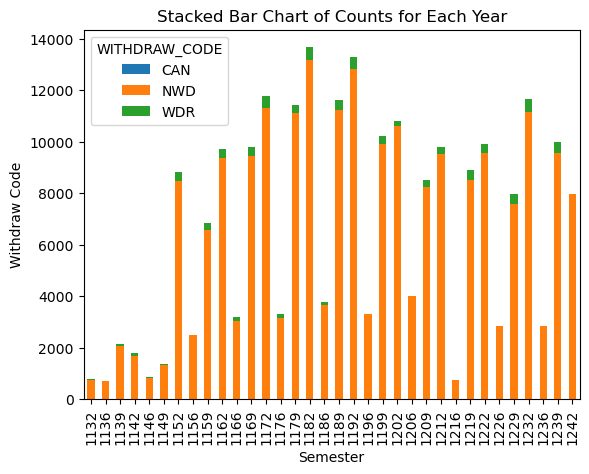

In [46]:
# Plot the distribution of the 'WITHDRAW_CODE' column using seaborn
df = pd.DataFrame(data)

# Count the occurrences of each value in 'ColumnB' for each year
count_df = df.groupby(['Semester', 'WITHDRAW_CODE']).size().unstack()

# Plotting a stacked bar graph
count_df.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Counts for Each Year')
plt.xlabel('Semester')
plt.ylabel('Withdraw Code')
plt.show()

There's a dip in counts in every Summer Semesters (Semester ending in 6).  There is very low count of Withdrawn records each Semester compared to the Not Withdrawn.  This is a very unbalanced distribution. Will take this into account.

Will need to transpose the StudentGroupLabels column to limit the duplicate rows per student within a semester.  

Another revelation with this data is that, the Withrdawn indication refers to the semester of that row.  What if a student drops out between a semester? Say a student fully completes a semester so the Withrawn indication will not be triggered.  But the student decides to not come back and never enrolls the following semester.  This should show no more subsquent semester rows for this student.  This is kind of considered a withrdawal or dropping out from the look of the data.  The student can very well have moved or transfered to another school to complete a degree but we do not have this information.  